# Workshop on Tensorflow
<img src = "https://upload.wikimedia.org/wikipedia/commons/2/2d/Tensorflow_logo.svg" align = "center">


## Importing dependencies

1. [Tensorflow](https://www.tensorflow.org/)
2. [Numpy](https://www.numpy.org/)
3. [Matplotlib](https://matplotlib.org)
4. [OS](https://docs.python.org/3/library/os.html)
5. [Pandas](https://pandas.pydata.org/)

In [27]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd
from tqdm import tqdm_notebook

os.environ['CUDA_VISIBLE_DEVICES'] = "0"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

%matplotlib inline

## Verifying import
print("Tensorflow version =",tf.__version__)
print("Using GPU" if tf.test.is_built_with_cuda() else "Not using GPU")

Tensorflow version = 1.10.0
Using GPU


## Creating Constant Scalars
**Note: Scalars are tensors with rank 0** 


In [3]:
## constant variables 0 dimensional
x = tf.constant(2.0)
y = tf.constant(3.0)

## basic addition operation
z = x + y

## creating tensorflow session
sess = tf.Session()

## running the tensorflow session
print(sess.run(z))

## closing session
sess.close()

5.0


In [4]:
## vector of integers
z_arr = tf.constant([1,2,3,4])

sess = tf.Session()
print(sess.run(z_arr))
sess.close()

[1 2 3 4]


In [5]:
inp = 500 * np.random.rand(500, 1)
out = 1.24 * inp + 21.0 + 100 * np.random.rand(500, 1)
print(inp.shape)
print(out.shape)

(500, 1)
(500, 1)


Text(0, 0.5, 'y')

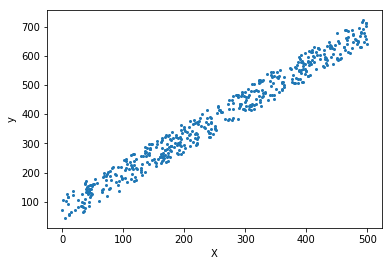

In [6]:
plt.scatter(inp, out, s = 4)
plt.xlabel("X")
plt.ylabel("y")

In [7]:
X = tf.placeholder(dtype = tf.float32, shape = [None, 1])
y = tf.placeholder(dtype = tf.float32, shape = [None, 1])
W = tf.get_variable(dtype = tf.float32, name = "weight", shape = [1], initializer = tf.initializers.random_normal)
b = tf.get_variable(dtype = tf.float32, name = "bias", shape = [1], initializer = tf.initializers.random_normal)

In [8]:
def getPrediction(W, X, b):
    return W*X + b

In [9]:
def loss(W, X, y, b):
    pred = getPrediction(W, X, b)
    return tf.losses.mean_squared_error(pred, y)

In [14]:
cost = loss(W, X, y, b)
optimizer = tf.train.GradientDescentOptimizer(0.00001).minimize(cost)
init = tf.global_variables_initializer()
weights = {}
costCache = []


152119.8
2232.549
2231.186
2229.8242
2228.463
2227.1035
2225.7456
2224.3882
2223.0334
2221.6782
2220.3252
2218.9744
2217.624
2216.2737
2214.9263
2213.58
2212.2346
2210.891
2209.5479
2208.206
2206.866
2205.527
2204.1895
2202.8535
2201.5176
2200.1843
2198.8516
2197.5205
2196.19
2194.861
2193.5332
2192.2075
2190.882
2189.5583
2188.2358
2186.915
2185.595
2184.2764
2182.9592
2181.6423
2180.327
2179.0137
2177.7014
2176.39
2175.08
2173.7715
2172.4639
2171.1572
2169.8525
2168.549
2167.2463
2165.945
2164.645
2163.3457
2162.048
2160.7515
2159.457
2158.1628
2156.8696
2155.5786
2154.289
2152.9998
2151.7117
2150.4258
2149.14
2147.856
2146.5732
2145.2908
2144.0112
2142.7322
2141.4536
2140.177
2138.901
2137.627
2136.3533
2135.0818
2133.8113
2132.542
2131.273
2130.0059
2128.74
2127.4756
2126.2112
2124.949
2123.6882
2122.4285
2121.1697
2119.9124
2118.656
2117.4004
2116.1462
2114.8938
2113.6426
2112.392
2111.1426
2109.8948
2108.6482
2107.4023
2106.158
2104.9148
2103.6724
2102.4314
2101.1917
2099.9536
20

1443.3022
1442.6882
1442.0741
1441.4604
1440.8473
1440.2343
1439.6213
1439.0107
1438.4033
1437.7963
1437.1891
1436.5824
1435.9768
1435.3704
1434.7645
1434.1592
1433.554
1432.949
1432.3442
1431.7397
1431.1364
1430.5325
1429.929
1429.3265
1428.7284
1428.1302
1427.5328
1426.9353
1426.3383
1425.7415
1425.145
1424.5488
1423.9529
1423.3573
1422.7618
1422.1666
1421.5719
1420.9775
1420.3832
1419.789
1419.198
1418.6094
1418.021
1417.433
1416.845
1416.2574
1415.6703
1415.0831
1414.4958
1413.9093
1413.3234
1412.7374
1412.1516
1411.5664
1410.9813
1410.3966
1409.8121
1409.2325
1408.6532
1408.0736
1407.4949
1406.9164
1406.3383
1405.7598
1405.1823
1404.6047
1404.0277
1403.4503
1402.8738
1402.2974
1401.7217
1401.1453
1400.57
1399.9965
1399.4258
1398.8557
1398.2861
1397.7163
1397.1467
1396.5774
1396.0089
1395.4404
1394.8718
1394.304
1393.7363
1393.1687
1392.6014
1392.0342
1391.468
1390.9015
1390.3383
1389.7765
1389.2155
1388.6545
1388.0941
1387.5337
1386.9739
1386.414
1385.8545
1385.2952
1384.7365
1384

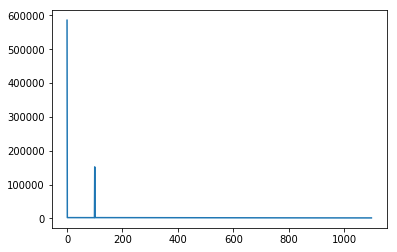

In [17]:
with tf.Session() as sess:
    sess.run(init)
    for num_iter in range(10**5):
        _, currentCost = sess.run([optimizer, cost], feed_dict = {X: inp, y: out})
        if num_iter % 1000 == 0:
            costCache.append(currentCost)
            print(currentCost)
    weights["weight"], weights["bias"] = W.eval(), b.eval()
    plt.plot(costCache)
        
        
    

In [16]:
print(weights)

{'weight': array([1.4458468], dtype=float32), 'bias': array([2.611507], dtype=float32)}


In [18]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11493376/11490434 [==============================] - 1s 0us/step


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [30]:
X = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.float32, shape = [None, 10])


tensorboard = TensorBoard(log_dir="logs/{}".format("board"))
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, callbacks = [tensorboard])
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 8s 137us/step - loss: 0.2224 - acc: 0.9337
Epoch 2/5
60000/60000 [==============================] - 8s 126us/step - loss: 0.0963 - acc: 0.9702
Epoch 3/5
60000/60000 [==============================] - 7s 120us/step - loss: 0.0682 - acc: 0.9782
Epoch 4/5
60000/60000 [==============================] - 8s 126us/step - loss: 0.0541 - acc: 0.9828
Epoch 5/5
10000/10000 [==============================] - 0s 34us/step


[0.06419828830986517, 0.9807]

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
